## Objectives

- Create a Jupyter notebook
- Apply data analysis and modeling techniques to housing price data
- Answer 11 questions: implement using Python code


## Project Scenario

- Topic: Real Estate
- Task: Determine the market price of a house given a set of features: quare footage, number of bedrooms, number of floors, and so on.


## Question

### Q1: Display the data types of each column using the function dtypes


In [2]:
import pandas as pd

df = pd.read_csv("lab1_kc_house_data.csv")

In [3]:
df.dtypes


id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

### Q2: Drop the columns "id" and "Unnamed: 0" from axis 1 using the method drop(), then use the method describe() to obtain a statistical summary of the data

In [5]:
df.drop('id', axis=1, inplace=True)


In [ ]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### Q3: Use the method value_counts to count the number of houses with unique floor values, use the method .to_frame() to convert it to a dataframe.


In [ ]:
floor_values = df['floors'].value_counts()

In [ ]:
floor_values.to_frame()

,count
floors,
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


### Q4: Use the function boxplot in the seaborn library to determine whether houses with a waterfront view or without a waterfront view have more price outliers.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

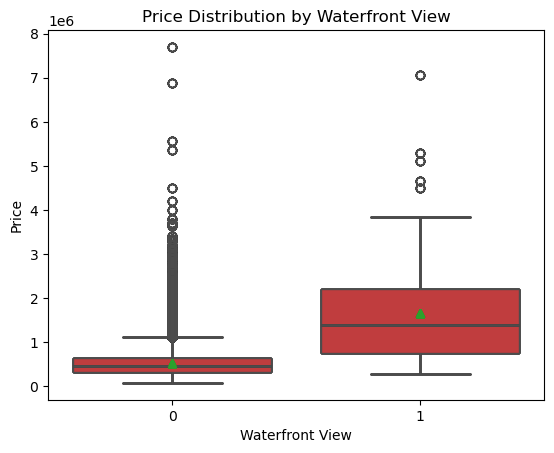

In [ ]:
sns.boxplot(
    x = "waterfront",
    y = "price",
    showmeans=True,
    data=df
)

plt.title("Price Distribution by Waterfront View")
plt.xlabel("Waterfront View")
plt.ylabel("Price")

plt.show()


### Q5: Use the function regplot in the seaborn library to determine if the feature sqft_above is negatively or positively correlated with price.

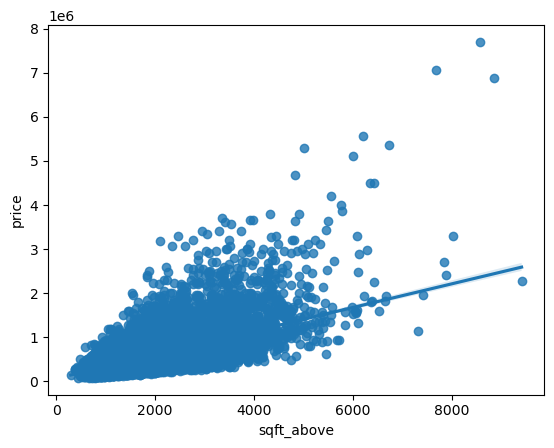

In [ ]:
sns.regplot(
    x = "sqft_above",
    y = "price",
    data = df,
    dropna=True
)

plt.show()

### Q6: Fit a linear regression model to predict the 'price' using the feature 'sqft_living' then calculate the R^2.


In [6]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [10]:
X = df[['sqft_living']]
Y = df['price']
lm = LinearRegression()
lm
lm.fit(X,Y)

print("Predicted Price: ", lm.predict(X))
print("R^2 =", lm.score(X, Y))



Predicted Price:  [287555.06702451 677621.82640197 172499.40418656 ... 242655.29616092
 405416.96554144 242655.29616092]
R^2 = 0.4928532179037931


### Q7: Fit a linear regression model to predict the 'price' using the list of features:

In [9]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"] 

Y = df['price']
lm2 = LinearRegression()
lm2.fit(df[features], Y)

print("Predicted Price: ", lm2.predict(df[features]))

print("R^2 =", lm2.score(df[features], Y))


Predicted Price:  [287160.14176653 661944.14176653 308152.14176653 ... 303544.14176653
 426424.14176653 303544.14176653]
R^2 = 0.6576681955617145


### Q8: Create a list of tuples, the first element in the tuple contains the name of the estimator:
### 'scale'
### 'polynomial'
### 'model'
### The second element in the tuple contains the model constructor
### StandardScaler()
### PolynomialFeatures(include_bias=False)
### LinearRegression()

In [18]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

lst_of_tuples = [('scale', StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]

### Q9: Use the list to create a pipeline object to predict the 'price', fit the object using the features in the list features, and calculate the R^2.

In [23]:
from sklearn.pipeline import Pipeline

pipe = Pipeline(lst_of_tuples)

pipe.fit(df[features], Y)

print("Predicted Price: ", pipe.predict(df[features]))
print("R^2 = ", pipe.score(df[features], Y))



Predicted Price:  [349672. 559264. 447689. ... 418805. 459685. 418733.]
R^2 =  0.7513502304473694


### Q10: Create and fit a Ridge regression object using the training data, set the regularization parameter to 0.1, and calculate the R^2 using the test data.

In [26]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)

In [28]:
ridgemodel = Ridge(alpha = 0.1)
ridgemodel.fit(x_train, y_train)

print("Predicted Price: ", ridgemodel.predict(x_test))
print("R^2 = ", ridgemodel.score(x_test, y_test))

Predicted Price:  [651717.1816658  514852.68999933 794223.17346005 ... 699436.23635906
 621538.45472192 376384.64159941]
R^2 =  0.6480374087702241


### Q11: Perform a second order polynomial transform on both the training data and testing data. Create and fit a Ridge regression object using the training data, set the regularisation parameter to 0.1, and calculate the R^2 utilising the test data provided.

In [31]:
pt = PolynomialFeatures(degree=2)
x_train_pt = pt.fit_transform(x_train[features])
x_test_pt = pt.fit_transform(x_test[features])

ridgemodel = Ridge(alpha=0.1)
ridgemodel.fit(x_train_pt, y_train)

print("R^2 training data = ", ridgemodel.score(x_train_pt, y_train))
print("R^2 testing data = ", ridgemodel.score(x_test_pt, y_test))

R^2 training data =  0.7418393311022059
R^2 testing data =  0.7004432036250098
